# Sklearn

In [ ]:
"""
cd .\100sklearn\
jupyter nbconvert --to markdown sklearn.ipynb --output README.md
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('jpg')

## Choosing the right Estimator


- [https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

<div align="center">
<img src="img/es.jpg" alt="es.jpg" width="900px">
</div>

### Regression

In [12]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
# boston_df['target'] = boston.target
# boston_df.head()
# !FutureWarning: load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

In [14]:
df = pd.read_csv("Boston.csv",index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
df.shape

(506, 14)

In [20]:
from sklearn.model_selection import train_test_split
# let's try the ridge regression model
from sklearn.linear_model import Ridge
# random seed for reproducibility
np.random.seed(0)

# create the data
X = df.drop('medv', axis=1)
y = df['medv']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# instantiate the model
model = Ridge()

# fit the model (taring the machine learning model)
model.fit(X_train, y_train)

# check the score on the test set (use the patterns the model has learned)
model.score(X_test, y_test)

(404, 13) (102, 13) (404,) (102,)


0.5796111714164921

 - How do we improve the model?
 - What if Ridge regression wasn't working?

#### Ensemble methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

- [https://scikit-learn.org/stable/modules/ensemble.html](https://scikit-learn.org/stable/modules/ensemble.html)

In [29]:
from sklearn.model_selection import train_test_split
# let try the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# seed the random number generator
np.random.seed(0)

# create the data
X = df.drop('medv', axis=1)
y = df['medv']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# instantiate and fit the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# check the score on the test set
model.score(X_test, y_test)

(404, 13) (102, 13) (404,) (102,)


0.7734908201180223

### Classification

In [35]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the estimator map above, let's try `LinearSVC`

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

# seed the random number generator
np.random.seed(0)

# create the data
X = df.drop('target', axis=1)
y = df['target']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# instantiate the model
model = LinearSVC()
model.fit(X_train, y_train)

# check the score on the test set
model.score(X_test, y_test)

(242, 13) (61, 13) (242,) (61,)


c:\Users\soiko\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.45901639344262296

#### Ensemble methods for classification

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# seed the random number generator
np.random.seed(0)

# create the data
X = df.drop('target', axis=1)
y = df['target']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# instantiate the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# check the score on the test set
model.score(X_test, y_test)

(242, 13) (61, 13) (242,) (61,)


0.8852459016393442

Titbit:

- If you have structured data, use `ensemble` methods
- If you have unstructured data, use `deep learning` or `transfer learning`

## Making Predictions

### With Classification Model

Using 
- `predict()`
- `predict_proba()`

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("heart-disease.csv")
np.random.seed(0)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# instantiate the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# check the score on the test set
clf.score(X_test, y_test)

(242, 13) (61, 13) (242,) (61,)


0.8852459016393442

#### `predict()` 

In [53]:
# get prediction:
clf.predict(X_test)


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
# original label
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [55]:
# compare the prediction with the truth label to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8852459016393442

using `accuracy_score(y_test, y_preds)`:

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8852459016393442

which is same as the `score(X_test, y_test)` method in scikit-learn

In [57]:
# ~
clf.score(X_test, y_test)


0.8852459016393442

#### `predict_proba()`

In [58]:
# return probabilities of a classification model
clf.predict_proba(X_test[:5])


array([[0.9 , 0.1 ],
       [0.56, 0.44],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.88, 0.12]])

### With Regression Model

In [59]:
df = pd.read_csv("Boston.csv",index_col=0)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

(404, 13) (102, 13) (404,) (102,)


0.7734908201180223

In [63]:
y_preds = model.predict(X_test)
y_preds[:5]

array([23.932, 29.111, 22.14 , 11.006, 20.543])

In [64]:
np.array(y_test[:5])


array([22.6, 50. , 23. ,  8.3, 21.2])

In [66]:
# compare the prediction with the truth label to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)
# ?????

0.0

In [67]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.6503039215686295

## Evaluation

- [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)

There are 3 different APIs for evaluating the quality of a model’s predictions:

- Estimator `score()` method
- The `scoring` parameter;  `cross-validation`
- Problem Specific Metric functions

### `model.score(X_test, y_test)`

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("heart-disease.csv")
np.random.seed(0)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# instantiate the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



(242, 13) (61, 13) (242,) (61,)


RandomForestClassifier()

In [75]:
# check the score on the test set
clf.score(X_test, y_test)

0.8852459016393442

In [76]:
df = pd.read_csv("Boston.csv",index_col=0)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)


(404, 13) (102, 13) (404,) (102,)


RandomForestRegressor()

In [77]:
regr.score(X_test, y_test)

0.7734908201180223

### cross validation with `cross_val_score()` 

<div align="center">
<img src="img/cv.jpg" alt="cv.jpg" width="700px">
</div>

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("heart-disease.csv")
np.random.seed(0)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# instantiate the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(242, 13) (61, 13) (242,) (61,)


0.8852459016393442

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(clf, X, y, cv=10)

array([0.87096774, 0.80645161, 0.83870968, 0.9       , 0.86666667,
       0.76666667, 0.73333333, 0.9       , 0.73333333, 0.8       ])

In [89]:
np.random.seed(0)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 10-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=10))

# compare the two scores
print(clf_single_score, clf_cross_val_score)

0.8852459016393442 0.8347311827956989


### Problem Specific Metrics for Classification

 - Accuracy
 - Area Under the ROC Curve
 - Confusion Matrix
 - Classification Report

#### Accuracy

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("heart-disease.csv")
np.random.seed(0)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
clf = RandomForestClassifier(n_estimators=100)


(242, 13) (61, 13) (242,) (61,)


In [91]:
cross_val_score = cross_val_score(clf, X, y, cv=10)

In [92]:
np.mean(cross_val_score)

0.8347311827956989

In [94]:
print(f"Heart disease Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease Cross-Validated Accuracy: 83.47%


#### Area Under the ROC Curve

**Area Under the receiver operating characteristic curve (ROC/AUC)**

- Area under the cure(AUC)
- ROC curve

ROC curve are a comparison of the true positive rate (TPR) versus a models false positive rate (FPR).

- `True positive`  = model predicts `1` and truth is `1`
- `False positive` = model predicts `1` and truth is `0`
- `True negative`  = model predicts `0` and truth is `0`
- `False negative` = model predicts `0` and truth is `1`

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("heart-disease.csv")
np.random.seed(0)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
clf = RandomForestClassifier(n_estimators=100)


(242, 13) (61, 13) (242,) (61,)


In [4]:
from sklearn.metrics import roc_curve

# fit 
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.86, 0.14],
       [0.46, 0.54],
       [0.4 , 0.6 ],
       [1.  , 0.  ],
       [0.84, 0.16]])

In [5]:
y_probs_positive  = y_probs[:, 1]
y_probs_positive[:5]

array([0.14, 0.54, 0.6 , 0.  , 0.16])

In [7]:
# calculate fpr,tp,thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.03703704, 0.14814815, 0.18518519,
       0.18518519, 0.18518519, 0.18518519, 0.22222222, 0.22222222,
       0.33333333, 0.37037037, 0.55555556, 0.55555556, 0.7037037 ,
       0.81481481, 0.88888889, 1.        ])

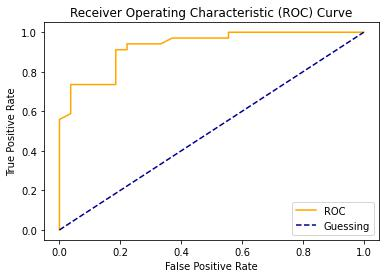

In [10]:
def plot_roc_curve(fpr,tpr):
	""" 
	Plots a ROC curve given the false positive rate and true positive rate.
	"""
	plt.plot(fpr, tpr, color='orange', label='ROC')
	plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
	# customise the plot
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('Receiver Operating Characteristic (ROC) Curve')
	plt.legend()
	plt.show()

plot_roc_curve(fpr,tpr)

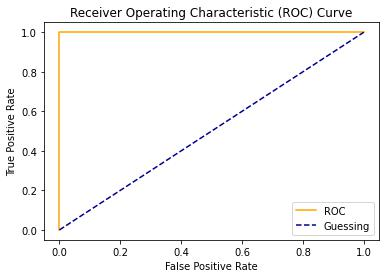

In [15]:
# how a perfect ROC curve looks like?
ftr , tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(ftr,tpr)

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)


0.9281045751633987

## Putting All Together: PipeLine + GridSearchCV

- [towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code](https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d)
- [towardsdatascience.com/are-you-using-pipeline-in-scikit-learn](https://towardsdatascience.com/are-you-using-pipeline-in-scikit-learn-ac4cd85cb27f)
- [https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

### v1: Pipelining up to Single Estimator


In [26]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# setup random seed for reproducibility
import numpy as np
np.random.seed(42)


#### 1. EDA

In [2]:
df = pd.read_csv("house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                      random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1095, 80) (365, 80) (1095,) (365,)


In [7]:
X_train.describe().T.iloc[:10]


,count,mean,std,min,25%,50%,75%,max
Id,1095.0,733.713242,421.940022,1.0,366.50,747.0,1099.5,1460.0
MSSubClass,1095.0,56.602740,42.201335,20.0,20.00,50.0,70.0,190.0
LotFrontage,896.0,69.764509,23.116448,21.0,58.75,69.5,80.0,313.0
LotArea,1095.0,10554.273973,10059.063819,1300.0,7734.00,9531.0,11592.0,215245.0
OverallQual,1095.0,6.071233,1.363015,1.0,5.00,6.0,7.0,10.0
OverallCond,1095.0,5.568037,1.115243,1.0,5.00,5.0,6.0,9.0
YearBuilt,1095.0,1971.006393,30.205435,1872.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1095.0,1984.691324,20.577087,1950.0,1966.50,1993.0,2003.0,2010.0
MasVnrArea,1090.0,104.244037,183.990710,0.0,0.00,0.0,170.0,1600.0
BsmtFinSF1,1095.0,441.032877,434.599451,0.0,0.00,381.0,716.0,2260.0


In [9]:
X_train.describe(include=object).T.iloc[:10]  # All object cols


,count,unique,top,freq
MSZoning,1095,5,RL,873
Street,1095,2,Pave,1090
Alley,65,2,Grvl,33
LotShape,1095,4,Reg,688
LandContour,1095,4,Lvl,991
Utilities,1095,2,AllPub,1094
LotConfig,1095,5,Inside,795
LandSlope,1095,3,Gtl,1030
Neighborhood,1095,25,NAmes,163
Condition1,1095,9,Norm,959


In [11]:
above_0_missing = X_train.isnull().sum() > 0
missing = X_train.isnull().sum()[above_0_missing]
missing.shape,missing

((19,),
 LotFrontage      199
 Alley           1030
 MasVnrType         5
 MasVnrArea         5
 BsmtQual          25
 BsmtCond          25
 BsmtExposure      25
 BsmtFinType1      25
 BsmtFinType2      26
 Electrical         1
 FireplaceQu      521
 GarageType        56
 GarageYrBlt       56
 GarageFinish      56
 GarageQual        56
 GarageCond        56
 PoolQC          1091
 Fence            896
 MiscFeature     1048
 dtype: int64)

19 features have NaNs

#### 2. Define numerical and categorical features.

In [12]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 37 numerical features: 

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 43 categorical features: 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### 3. PipeLine 1: For categorical features: fill missing values then label encode

For categoricals, we will use `SimpleImputer` to fill the missing values with the `mode`(value that appears most often) of each column. And then convert the categorical columns to numerical columns using `OneHotEncoder`.

In [15]:
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


> Set `handle_unknown` to `ignore` to skip previously unseen labels. Otherwise, `OneHotEncoder` throws an error if there are labels in test set that are not in train set.

#### 4. PipeLine 2: For numerical features: fill missing values then feature scale

For numeric columns, we first fill the missing values with `SimpleImputer` using the `mean` and feature scale using `MinMaxScaler`.

In [16]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])


#### 5. Combine numerical and categorical transformer using `ColumnTransformer`.

By default, all `Pipeline` objects have `fit` and `transform` methods which can be used to transform the input array like this:

In [17]:
numeric_pipeline.fit_transform(X_train.select_dtypes(include='number'))

array([[0.88553804, 0.29411765, 0.13356164, ..., 0.        , 1.        ,
        0.75      ],
       [0.69773818, 0.35294118, 0.16700174, ..., 0.        , 0.36363636,
        0.25      ],
       [0.83139136, 0.35294118, 0.16700174, ..., 0.        , 0.36363636,
        0.        ],
       ...,
       [0.83344757, 0.41176471, 0.1609589 , ..., 0.        , 0.27272727,
        1.        ],
       [0.38313914, 0.58823529, 0.16700174, ..., 0.        , 0.81818182,
        0.        ],
       [0.46881426, 0.23529412, 0.12671233, ..., 0.        , 0.45454545,
        1.        ]])

But, using the pipelines in this way means we have to call each pipeline separately on selected columns which is not what we want. What we want is to have a single preprocessor that is able to perform both numeric and categorical transformations in a single line of code like this: `full_processor.fit_transform(X_train)`

`ColumnTransformer` helps to define different transformers for different types of inputs and combine them into a single feature space after transformation. Here we are applying numerical transformer and categorical transformer created above for our numerical and categorical features.

In [20]:
data_transformers = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])


> Remember that `numerical_features` and `categorical_features` contain the respective names of columns from `X_train`.

Similar to `Pipeline` class, `ColumnTransformer` takes a tuple of transformers. Each tuple `("step_name",transformer,columns)`should contain an arbitrary step name, the transformer itself and the list of column names that the transformer should be applied to . Here, we are creating a column transformer with 2 steps using both of our numeric and categorical preprocessing pipelines

#### 6. (optional) Apply PCA to reduce dimensions.

Principle Component Analysis aka PCA is a linear dimensionality reduction algorithm that is used to reduce the number of features in the dataset by keeping the maximum variance.

In [24]:
#  Creating preprocessor pipeline which will first transform the data
# and then apply PCA.
preprocessor = Pipeline(steps=[('data_transformers', data_transformers),
                             ('reduce_dim',PCA())])

#### 7. Final Pipeline With an Estimator

In [35]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RandomForestRegressor())])

In [36]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6497809474139162

#### Visualizing Pipeline

In [31]:
# imports 
from sklearn import set_config                      # to change the display
from sklearn.utils import estimator_html_repr       # to save the diagram into HTML format

# set config to diagram for visualizing the pipelines/composite estimators
set_config(display='diagram')

model


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformers',
                                  ColumnTransformer(transformers=[('number',
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer()),
                                                                                   ('scale',
                                                                                    MinMaxScaler())]),
                                                                   ['Id',
                                                                    'MSSubClass',
                                                                    'LotFrontage',
                                                                    'LotArea',
                                                                    'OverallQual',
                                                                    'OverallCond',
                                                                    'YearBuilt',
                                                                    'YearRemodAdd',
                                                                    'MasVnrArea',
                                                                    'BsmtFinSF1',
                                                                    'BsmtFinSF2',
                                                                    'BsmtUnfSF',
                                                                    'TotalBsmtSF',
                                                                    '1stFl...
                                                                    'LandSlope',
                                                                    'Neighborhood',
                                                                    'Condition1',
                                                                    'Condition2',
                                                                    'BldgType',
                                                                    'HouseStyle',
                                                                    'RoofStyle',
                                                                    'RoofMatl',
                                                                    'Exterior1st',
                                                                    'Exterior2nd',
                                                                    'MasVnrType',
                                                                    'ExterQual',
                                                                    'ExterCond',
                                                                    'Foundation',
                                                                    'BsmtQual',
                                                                    'BsmtCond',
                                                                    'BsmtExposure',
                                                                    'BsmtFinType1',
                                                                    'BsmtFinType2',
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'CentralAir',
                                                                    'Electrical', ...])])),
                                 ('reduce_dim', PCA())])),
                ('model', RandomForestRegressor())])

## Resource